In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv('train_8wry4cB.csv')

In [2]:
data.head()


,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [3]:
data.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [23]:
from datetime import datetime
war_start = '2011-01-03'
datetime.strptime(war_start, '%Y-%m-%d')

# data['duration'] = data['endTime']-data['startTime'] 
# data['duration'].head()

datetime.datetime(2011, 1, 3, 0, 0)

In [5]:
data['startTime'] = pd.to_datetime(data['startTime'])

In [6]:
data.dtypes

session_id             object
startTime      datetime64[ns]
endTime                object
ProductList            object
gender                 object
dtype: object

In [7]:
data['endTime'] = pd.to_datetime(data['endTime'])
data.dtypes

session_id             object
startTime      datetime64[ns]
endTime        datetime64[ns]
ProductList            object
gender                 object
dtype: object

In [8]:
data['duration'] = data['endTime'] - data['startTime']

In [9]:
data['duration'].head()

0   00:01:00
1   00:06:00
2   00:00:00
3   00:03:00
4   00:02:00
Name: duration, dtype: timedelta64[ns]

In [10]:
data['ProductList']

0        A00002/B00003/C00006/D28435/;A00002/B00003/C00...
1        A00001/B00009/C00031/D29404/;A00001/B00009/C00...
2                             A00002/B00001/C00020/D16944/
3        A00002/B00004/C00018/D10284/;A00002/B00004/C00...
4        A00001/B00001/C00012/D30805/;A00001/B00001/C00...
5                             A00002/B00002/C00081/D25039/
6        A00002/B00011/C00180/D18487/;A00002/B00011/C00...
7        A00002/B00001/C00059/D15254/;A00002/B00001/C00...
8                             A00002/B00001/C00010/D06129/
9        A00002/B00001/C00010/D12841/;A00002/B00002/C00...
10                            A00002/B00007/C00024/D02625/
11                            A00002/B00002/C00002/D22971/
12       A00002/B00001/C00150/D35471/;A00002/B00001/C00...
13       A00001/B00031/C00044/D01652/;A00001/B00031/C00...
14       A00002/B00002/C00002/D21686/;A00002/B00002/C00...
15       A00003/B00012/C00051/D07771/;A00003/B00012/C00...
16                            A00002/B00007/C00024/D0334

In [11]:
len(data['session_id'].unique())

10500

In [12]:
data['ProductList'] = data['ProductList'].str.split(";")
data['ProductList'].head()

0    [A00002/B00003/C00006/D28435/, A00002/B00003/C...
1    [A00001/B00009/C00031/D29404/, A00001/B00009/C...
2                       [A00002/B00001/C00020/D16944/]
3    [A00002/B00004/C00018/D10284/, A00002/B00004/C...
4    [A00001/B00001/C00012/D30805/, A00001/B00001/C...
Name: ProductList, dtype: object

In [13]:
len(data['ProductList'].iloc[1])

7

In [14]:
data['no.of.products'] = data['ProductList'].apply(lambda x: len(x))

In [15]:
data['no.of.products'].head()

0    4
1    7
2    1
3    3
4    2
Name: no.of.products, dtype: int64

In [16]:
data.head()

,session_id,startTime,endTime,ProductList,gender,duration,no.of.products
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",female,00:01:00,4
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",male,00:06:00,7
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,[A00002/B00001/C00020/D16944/],female,00:00:00,1
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",female,00:03:00,3
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",male,00:02:00,2


In [19]:
# data['duration'] = data['duration'].apply(lambda x: x.total_seconds())
data['duration'] = data['duration'].dt.total_seconds()

In [20]:
data['duration'].head()

0     60.0
1    360.0
2      0.0
3    180.0
4    120.0
Name: duration, dtype: float64

In [25]:
# data['startTime'] = pd.to_datatime(data['startTime'])
# data['endTime'] = pd.to_datatime(data['endTime'])
data.head()

,session_id,startTime,endTime,ProductList,gender,duration,no.of.products
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",female,60.0,4
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",male,360.0,7
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,[A00002/B00001/C00020/D16944/],female,0.0,1
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",female,180.0,3
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",male,120.0,2


In [26]:
data['start_year'] = pd.DatetimeIndex(data['startTime']).year
data['start_month'] = pd.DatetimeIndex(data['startTime']).month
data.head()

,session_id,startTime,endTime,ProductList,gender,duration,no.of.products,start_year,start_month
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",female,60.0,4,2014,12
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",male,360.0,7,2014,12
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,[A00002/B00001/C00020/D16944/],female,0.0,1,2014,1
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",female,180.0,3,2014,11
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",male,120.0,2,2014,12


In [27]:
data['start_day'] = pd.DatetimeIndex(data['startTime']).day
data['end_year'] = pd.DatetimeIndex(data['endTime']).year
data['end_month'] = pd.DatetimeIndex(data['endTime']).month
data['end_day'] = pd.DatetimeIndex(data['endTime']).day
data.head()

,session_id,startTime,endTime,ProductList,gender,duration,no.of.products,start_year,start_month,start_day,end_year,end_month,end_day
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",female,60.0,4,2014,12,15,2014,12,15
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",male,360.0,7,2014,12,16,2014,12,16
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,[A00002/B00001/C00020/D16944/],female,0.0,1,2014,1,12,2014,1,12
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",female,180.0,3,2014,11,23,2014,11,23
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",male,120.0,2,2014,12,17,2014,12,17


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(data[['duration','no.of.products','start_year','end_year','start_month','end_month','start_day','end_day']]
                                                    , data.gender
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=4
                                                   )


# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


0.7695238095238095


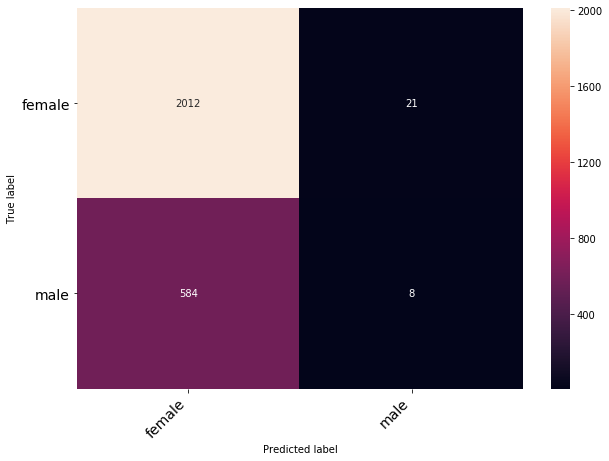

In [32]:

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test) 
# model accuracy for X_test   
accuracy = xgb.score(X_test, y_test) 
print(accuracy)
# creating a confusion matrix for test
cm = confusion_matrix(y_test, xgb_predictions) 
classes = y_test.unique()
classes.sort()    
print_confusion_matrix(cm, class_names = classes)



